In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
from nba_api.stats.endpoints.leaguedashteamptshot import LeagueDashTeamPtShot

In [23]:
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats

In [26]:
fourth_df = LeagueDashTeamStats(season_type_all_star='Playoffs', period='4', last_n_games='3').get_data_frames()[0]
third_df = LeagueDashTeamStats(season_type_all_star='Playoffs', period='3', last_n_games='3').get_data_frames()[0]
second_df = LeagueDashTeamStats(season_type_all_star='Playoffs', period='2', last_n_games='3').get_data_frames()[0]
first_df = LeagueDashTeamStats(season_type_all_star='Playoffs', period='1', last_n_games='3').get_data_frames()[0]

In [18]:
plt.style.use('fivethirtyeight')

In [28]:
miami_id = 1610612748
bucks_id = 1610612749

In [27]:
fourth_df

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612738,Boston Celtics,3,2,1,0.667,36.0,26,50,0.520,...,16,9,8,1,11,13,5,3,10,Boston Celtics
1,1610612751,Brooklyn Nets,3,0,3,0.000,36.0,24,64,0.375,...,13,15,1,8,2,4,6,14,10,Brooklyn Nets
2,1610612742,Dallas Mavericks,3,1,2,0.333,36.0,28,69,0.406,...,1,9,10,5,5,14,8,15,10,Dallas Mavericks
3,1610612743,Denver Nuggets,3,2,1,0.667,36.0,28,56,0.500,...,8,7,3,1,5,11,8,6,10,Denver Nuggets
4,1610612745,Houston Rockets,3,2,1,0.667,36.0,25,62,0.403,...,3,12,3,12,11,8,12,4,10,Houston Rockets
5,1610612754,Indiana Pacers,3,0,3,0.000,36.0,24,56,0.429,...,8,1,8,12,16,11,10,8,10,Indiana Pacers
6,1610612746,LA Clippers,3,3,0,1.000,36.0,37,61,0.607,...,8,16,13,8,5,14,1,2,10,LA Clippers
7,1610612747,Los Angeles Lakers,3,2,1,0.667,36.0,26,60,0.433,...,15,2,3,1,10,5,11,12,10,Los Angeles Lakers
8,1610612748,Miami Heat,3,3,0,1.000,36.0,26,54,0.481,...,3,2,3,6,8,1,2,1,10,Miami Heat
9,1610612749,Milwaukee Bucks,3,0,3,0.000,36.0,19,62,0.306,...,13,12,10,12,15,8,16,16,10,Milwaukee Bucks


In [29]:
miami_dfs = []
bucks_dfs = []

for item in [first_df, second_df, third_df, fourth_df]:
    miami_dfs.append(item.loc[item.TEAM_ID == miami_id])
    bucks_dfs.append(item.loc[item.TEAM_ID == bucks_id])

In [30]:
miami_dfs[0]

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
8,1610612748,Miami Heat,3,3,0,1.0,36.0,32,66,0.485,...,2,6,8,11,11,6,5,9,10,Miami Heat


In [41]:
miami_color = '#98002E'
miami_color_made = '#470116'
miami_secondary_blue = '#41B6E6'
miami_secondary = '#DB3EB1'

bucks_color = '#00471B'
bucks_color_made = '#061A0E'
bucks_cream = '#EEE1C6'

In [47]:

bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'


Text(0.5, 1.0, 'Bucks vs Miami, Efficiency Through Quarters')

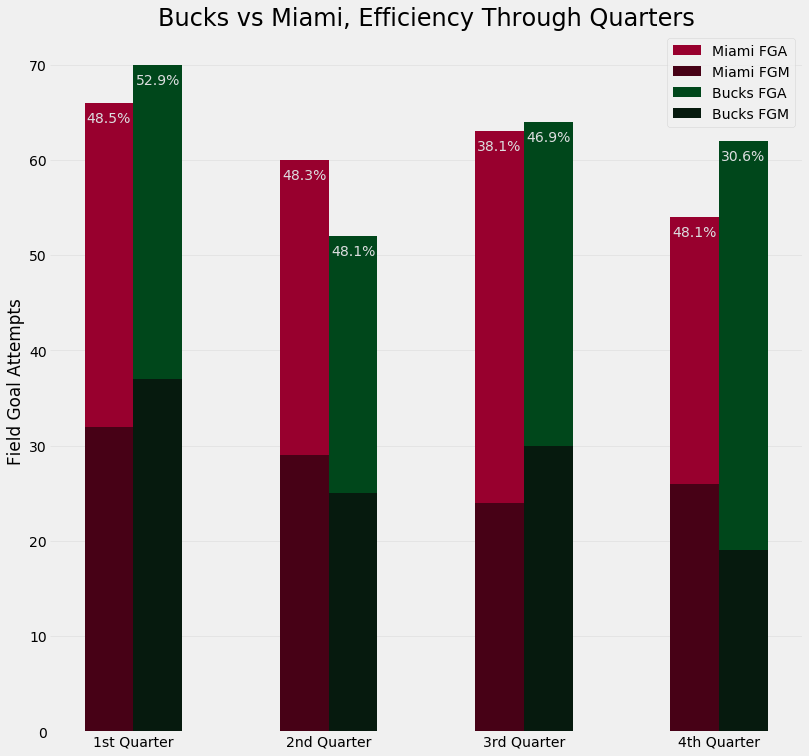

In [93]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.bar(x=0.75, height=miami_dfs[0].FGA, width=0.25, align='edge', color=miami_color, joinstyle='round', label='Miami FGA')
ax.bar(x=0.75, height=miami_dfs[0].FGM, width=0.25, align='edge', color=miami_color_made, joinstyle='round', label='Miami FGM')
ax.text(x=0.875, y=miami_dfs[0].FGA - 2, s=f"{miami_dfs[0].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)

ax.bar(x=1.0, height=bucks_dfs[0].FGA, width=0.25, align='edge', color=bucks_color, joinstyle='round', label='Bucks FGA')
ax.bar(x=1.0, height=bucks_dfs[0].FGM, width=0.25, align='edge', color=bucks_color_made, joinstyle='round', label='Bucks FGM')
ax.text(x=1.125, y=bucks_dfs[0].FGA - 2, s=f"{bucks_dfs[0].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)

ax.bar(x=1.75, height=miami_dfs[1].FGA, width=0.25, align='edge', color=miami_color, joinstyle='round')
ax.bar(x=1.75, height=miami_dfs[1].FGM, width=0.25, align='edge', color=miami_color_made, joinstyle='round')
ax.text(x=1.875, y=miami_dfs[1].FGA - 2, s=f"{miami_dfs[1].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)
ax.bar(x=2.0, height=bucks_dfs[1].FGA, width=0.25, align='edge', color=bucks_color, joinstyle='round')
ax.bar(x=2.0, height=bucks_dfs[1].FGM, width=0.25, align='edge', color=bucks_color_made, joinstyle='round')
ax.text(x=2.125, y=bucks_dfs[1].FGA - 2, s=f"{bucks_dfs[1].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)

ax.bar(x=2.75, height=miami_dfs[2].FGA, width=0.25, align='edge', color=miami_color, joinstyle='round')
ax.bar(x=2.75, height=miami_dfs[2].FGM, width=0.25, align='edge', color=miami_color_made, joinstyle='round')
ax.text(x=2.875, y=miami_dfs[2].FGA - 2, s=f"{miami_dfs[2].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)
ax.bar(x=3.0, height=bucks_dfs[2].FGA, width=0.25, align='edge', color=bucks_color, joinstyle='round')
ax.bar(x=3.0, height=bucks_dfs[2].FGM, width=0.25, align='edge', color=bucks_color_made, joinstyle='round')
ax.text(x=3.125, y=bucks_dfs[2].FGA - 2, s=f"{bucks_dfs[2].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)

ax.bar(x=3.75, height=miami_dfs[3].FGA, width=0.25, align='edge', color=miami_color, joinstyle='round')
ax.bar(x=3.75, height=miami_dfs[3].FGM, width=0.25, align='edge', color=miami_color_made, joinstyle='round')
ax.text(x=3.875, y=miami_dfs[3].FGA - 2, s=f"{miami_dfs[3].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)
ax.bar(x=4.0, height=bucks_dfs[3].FGA, width=0.25, align='edge', color=bucks_color, joinstyle='round')
ax.bar(x=4.0, height=bucks_dfs[3].FGM, width=0.25, align='edge', color=bucks_color_made, joinstyle='round')
ax.text(x=4.125, y=bucks_dfs[3].FGA - 2, s=f"{bucks_dfs[3].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)


ax.set_ylabel("Field Goal Attempts")
ax.grid(alpha=0.3)
ax.grid(False, axis='x')
#ax.set_facecolor(bball_gray)
#fig.set_facecolor(bball_gray)
ax.set_frame_on(False)
ax.set_xticks([item for item in range(1, 5)])
#ax.set_yticks([])
ax.set_xticklabels(["1st Quarter", "2nd Quarter", "3rd Quarter", "4th Quarter"])

legend = ax.legend()
ax.set_title("Bucks vs Miami, Efficiency Through Quarters", size=24)
#ax.text(x=4.25, y=-5, s='created: twitter.com/daniel_bratulic', ha='right', size=12)
#ax.text(x=0.75, y=-5, s='source: stats.nba.com', ha='left', size=12)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.bar(x=0.75, height=miami_dfs[0].FGA, width=0.25, align='edge', color=miami_color, joinstyle='round', label='Miami FGA')
ax.bar(x=0.75, height=miami_dfs[0].FGM, width=0.25, align='edge', color=miami_color_made, joinstyle='round', label='Miami FGM')
ax.text(x=0.875, y=miami_dfs[0].FGA - 2, s=f"{miami_dfs[0].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)

ax.bar(x=1.0, height=bucks_dfs[0].FGA, width=0.25, align='edge', color=bucks_color, joinstyle='round', label='Bucks FGA')
ax.bar(x=1.0, height=bucks_dfs[0].FGM, width=0.25, align='edge', color=bucks_color_made, joinstyle='round', label='Bucks FGM')
ax.text(x=1.125, y=bucks_dfs[0].FGA - 2, s=f"{bucks_dfs[0].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)

ax.bar(x=1.75, height=miami_dfs[1].FGA, width=0.25, align='edge', color=miami_color, joinstyle='round')
ax.bar(x=1.75, height=miami_dfs[1].FGM, width=0.25, align='edge', color=miami_color_made, joinstyle='round')
ax.text(x=1.875, y=miami_dfs[1].FGA - 2, s=f"{miami_dfs[1].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)
ax.bar(x=2.0, height=bucks_dfs[1].FGA, width=0.25, align='edge', color=bucks_color, joinstyle='round')
ax.bar(x=2.0, height=bucks_dfs[1].FGM, width=0.25, align='edge', color=bucks_color_made, joinstyle='round')
ax.text(x=2.125, y=bucks_dfs[1].FGA - 2, s=f"{bucks_dfs[1].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)

ax.bar(x=2.75, height=miami_dfs[2].FGA, width=0.25, align='edge', color=miami_color, joinstyle='round')
ax.bar(x=2.75, height=miami_dfs[2].FGM, width=0.25, align='edge', color=miami_color_made, joinstyle='round')
ax.text(x=2.875, y=miami_dfs[2].FGA - 2, s=f"{miami_dfs[2].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)
ax.bar(x=3.0, height=bucks_dfs[2].FGA, width=0.25, align='edge', color=bucks_color, joinstyle='round')
ax.bar(x=3.0, height=bucks_dfs[2].FGM, width=0.25, align='edge', color=bucks_color_made, joinstyle='round')
ax.text(x=3.125, y=bucks_dfs[2].FGA - 2, s=f"{bucks_dfs[2].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)

ax.bar(x=3.75, height=miami_dfs[3].FGA, width=0.25, align='edge', color=miami_color, joinstyle='round')
ax.bar(x=3.75, height=miami_dfs[3].FGM, width=0.25, align='edge', color=miami_color_made, joinstyle='round')
ax.text(x=3.875, y=miami_dfs[3].FGA - 2, s=f"{miami_dfs[3].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)
ax.bar(x=4.0, height=bucks_dfs[3].FGA, width=0.25, align='edge', color=bucks_color, joinstyle='round')
ax.bar(x=4.0, height=bucks_dfs[3].FGM, width=0.25, align='edge', color=bucks_color_made, joinstyle='round')
ax.text(x=4.125, y=bucks_dfs[3].FGA - 2, s=f"{bucks_dfs[3].iloc[0].FG_PCT * 100:.1f}%", ha='center', color=bball_white)


ax.grid(alpha=0.3)
ax.grid(False, axis='x')
#ax.set_facecolor(bball_gray)
#fig.set_facecolor(bball_gray)
ax.set_frame_on(False)
ax.set_xticks([item for item in range(1, 5)])
ax.set_yticks([])
ax.set_xticklabels(["1st Quarter", "2nd Quarter", "3rd Quarter", "4th Quarter"])

legend = ax.legend()
ax.set_title("Bucks vs Miami, Efficiency Through Quarters", size=24)
ax.text(x=4.25, y=-5, s='created: twitter.com/daniel_bratulic', ha='right', size=12)
ax.text(x=0.75, y=-5, s='source: stats.nba.com', ha='left', size=12)